In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import sys
sys.path.insert(0,'/home/users/eboland/smurphs/python')
import utils
import numpy as np
from scipy import stats

In [2]:
# Directories for saving plots and finding input data
figs_dir = '/home/users/eboland/smurphs_notebooks/'
data_dir='~/smurphs/data_out/smurphs_ensemble/'

# Experiment info, don't alter
exps=['historical0p2','historical0p4','historical0p7','historical1p0','historical1p5']
runs=['r1i1p1f1','r2i1p1f1','r3i1p1f1','r4i1p1f1','r5i1p1f1']
exp_names=['0.2','0.4','0.7','1.0','1.5']
y_start=[1960,1980]
y_end=[1991,2011]
basins=['global','atl','pac','so','ind']
basin_name=dict(zip(basins,['Global','Atlantic','Pacific','Southern','Indian']))
forc=xr.DataArray(coords={'exp':exps},data=[0.38,0.6,0.93,1.17,1.5],dims=['exp'],)

# Plotting choices
clims={'so':[-6,6],
   'pac':[-5,5],
   'ind':[-2,2],
   'global':[-8,8],
   'atl':[-2.5,2.5]}
latlims={'so':[-75,-35],
          'pac':[-35,70],
          'ind':[-35,28.5],
          'global':[-75,75],
          'atl':[-35,70]}

In [3]:
ohu_yz=xr.open_dataarray(data_dir+'ohcA_yz_trend_byrun.nc')
del ohu_yz['parameter']
ohu_yz['depth_alt']=xr.where(ohu_yz['deptht']<1000,ohu_yz['deptht']*500/200,ohu_yz['deptht']+1500)

In [4]:
yy=ohu_yz
xx=forc.broadcast_like(yy)
all_stats=utils.lin_regress(xx.stack(exp_run=('exp','run')),yy.stack(exp_run=('exp','run')),[['exp_run'],['exp_run']])
slopes= all_stats.sel(parameter='slope')/1e10
t_score=all_stats.sel(parameter='r_value')*np.sqrt(25-2)/np.sqrt(1-all_stats.sel(parameter='r_value')**2)
tpval = stats.t.sf(np.abs(t_score),25-1)
sigs = slopes.copy(data=tpval<=0.05)

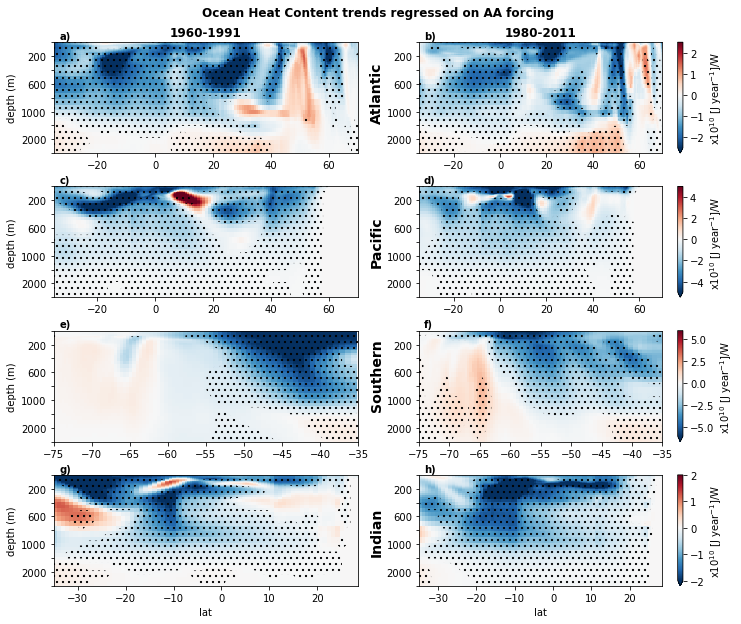

In [5]:
%matplotlib inline
fig, axes = plt.subplots(4, 2, gridspec_kw={'hspace':0.3,'wspace':0.2},sharey='col',figsize=(12,10))

ip=0
for ib,basin in enumerate(['atl','pac','so','ind']):
    for it in range(0,2):
        ax=axes[ib,it]
        dplot_slope=slopes.sel(basin=basin).isel(time=it)        
        dplot_sig=sigs.sel(basin=basin).isel(time=it)    
        if it==0:
            dplot_slope.plot(x='lat',y='depth_alt',yincrease=False,
                add_colorbar=False,
                vmin=clims[basin][0],vmax=clims[basin][1],
                cmap='RdBu_r',rasterized=True,ax=ax)
        else:
            dplot_slope.plot(x='lat',y='depth_alt',yincrease=False,
                add_colorbar=True,
                vmin=clims[basin][0],vmax=clims[basin][1],
               cbar_kwargs={'label': 'x10$^{10}$ [J year$^{-1}$]/W '}, cmap='RdBu_r',rasterized=True,ax=ax)            
        dplot_sig.plot.contourf(x='lat',y='depth_alt',alpha=0,levels=[-1,0,1],hatches=[None,'..'],
                                              add_colorbar=False,yincrease=False,ax=ax)
        
        ax.text(0.02,1.03,'{})'.format(chr(ord('a')+ip)),fontweight='bold',transform=ax.transAxes)

        if ib==0:
            ax.set_title(str(y_start[it])+'-'+str(y_end[it]),fontweight='bold')
        else:
            ax.set_title('')
        ax.set_xlim(latlims[basin][0],latlims[basin][1])   
        ax.set_ylim([4000,0])      
        ax.set_yticks([4000, 3500, 3000, 2500, 2000, 1500, 1000, 500, 0])
        ax.set_yticklabels(['',2000,'',1000,'', 600, '',200,''])
        if it == 0:
            ax.set(ylabel='depth (m)')
        else:
            ax.set(ylabel='')
            ax.text(-0.2,0.3,basin_name[basin],fontweight='bold',transform=ax.transAxes,rotation=90,fontsize=14)
        if ib<3:
            ax.set(xlabel='')
        ip=ip+1
        
plt.suptitle('Ocean Heat Content trends regressed on AA forcing',weight='bold',y=0.93)
plt.savefig(figs_dir+'Fig8_OHS_yz_regress_basins.png',bbox_inches='tight')
plt.savefig(figs_dir+'Fig8_OHS_yz_regress_basins.pdf',bbox_inches='tight')

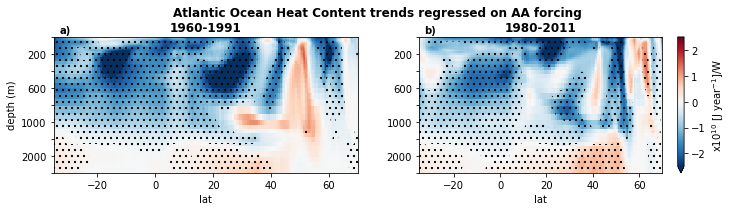

In [12]:
%matplotlib inline
basin='atl'
fig, axes = plt.subplots(1, 2, gridspec_kw={'hspace':0.3,'wspace':0.2},sharey='col',figsize=(12,10/4))

ip=0
for it in range(0,2):
    ax=axes[it]
    dplot_slope=slopes.sel(basin=basin).isel(time=it)        
    dplot_sig=sigs.sel(basin=basin).isel(time=it)    
    if it==0:
        dplot_slope.plot(x='lat',y='depth_alt',yincrease=False,
            add_colorbar=False,
            vmin=clims[basin][0],vmax=clims[basin][1],
            cmap='RdBu_r',rasterized=True,ax=ax)
    else:
        dplot_slope.plot(x='lat',y='depth_alt',yincrease=False,
            add_colorbar=True,
            vmin=clims[basin][0],vmax=clims[basin][1],
           cbar_kwargs={'label': 'x10$^{10}$ [J year$^{-1}$]/W '}, cmap='RdBu_r',rasterized=True,ax=ax)            
    dplot_sig.plot.contourf(x='lat',y='depth_alt',alpha=0,levels=[-1,0,1],hatches=[None,'..'],
                                          add_colorbar=False,yincrease=False,ax=ax)

    ax.text(0.02,1.03,'{})'.format(chr(ord('a')+ip)),fontweight='bold',transform=ax.transAxes)


    ax.set_title(str(y_start[it])+'-'+str(y_end[it]),fontweight='bold')

    ax.set_xlim(latlims[basin][0],latlims[basin][1])   
    ax.set_ylim([4000,0])      
    ax.set_yticks([4000, 3500, 3000, 2500, 2000, 1500, 1000, 500, 0])
    ax.set_yticklabels(['',2000,'',1000,'', 600, '',200,''])
    if it == 0:
        ax.set(ylabel='depth (m)')
    else:
        ax.set(ylabel='')
    ip=ip+1
        
plt.suptitle('{} Ocean Heat Content trends regressed on AA forcing'.format(basin_name[basin]),weight='bold',y=1.05)
plt.savefig(figs_dir+'Fig8_OHS_yz_regress_{}.png'.format(basin),bbox_inches='tight')
plt.savefig(figs_dir+'Fig8_OHS_yz_regress_{}.pdf'.format(basin),bbox_inches='tight')